In [1]:
import rescomp as rc
from scipy import sparse
import scipy as sp
import numpy as np
import numdifftools as ndt
from matplotlib import pyplot as plt

# Test Jacobian

In [17]:
rcomp = rc.ResComp(res_sz=100)

In [22]:
r0 = np.random.rand(rcomp.res_sz)
u0 = np.random.rand(rcomp.signal_dim)
u = lambda x: u0
f = lambda r : rcomp.res_f(0, r, u)
J = lambda r : rcomp.jacobian(r, u0)
Jnum = ndt.Jacobian(f)
np.max(np.abs(J(r0) - Jnum(r0)))

9.392486788328824e-14

In [135]:
RES = {
    'res_sz': 10, 
    'activ_f': np.tanh, 
    'mean_degree': 2.0, 
    'ridge_alpha': 0.0001, 
    'spect_rad': 0.9, 
    'sparse_res': True, 
    'sigma': 0.1, 
    'uniform_weights': True, 
    'gamma': 1.0, 
    'signal_dim': 3, 
    'max_weight': 10, 
    'min_weight': 0
}

In [136]:
rcomp = rc.ResComp(**RES)

In [137]:
r0 = np.random.rand(rcomp.res_sz)
u0 = np.random.rand(rcomp.signal_dim)
u = lambda x: u0
f = lambda r : rcomp.res_f(0, r, u)
J = lambda r : rcomp.jacobian(r, u0)
Jnum = ndt.Jacobian(f)
np.max(np.abs(J(r0) - Jnum(r0)))

2.603472992745992e-14

In [138]:
J(r0).toarray()

array([[-1.        ,  0.45342847,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.45342847],
       [ 0.44922687, -1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -1.        ,  0.32597956,  0.32597956,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.44495609,  0.        ,  0.        , -1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.44495609],
       [ 0.        ,  0.        ,  0.22894581,  0.        , -1.        ,
         0.22894581,  0.        ,  0.        ,  0.22894581,  0.        ],
       [ 0.38796956,  0.        ,  0.38796956,  0.        ,  0.        ,
        -1.        ,  0.38796956,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.45884542,  0.        ,
         0.        , -1.        ,  0.        

In [134]:
Jnum(r0)

array([[-1.        ,  0.21786576,  0.        ,  0.21786576,  0.        ,
         0.        ,  0.21786576,  0.        ,  0.        ,  0.        ],
       [ 0.37396279, -1.        ,  0.        ,  0.        ,  0.        ,
         0.37396279,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.35142067, -1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.35142067,  0.        ],
       [ 0.        ,  0.        ,  0.        , -1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -1.        ,
         0.        ,  0.        ,  0.37049562,  0.37049562,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -1.        ,  0.32832343,  0.32832343,  0.32832343,  0.        ],
       [ 0.        ,  0.3450005 ,  0.        ,  0.        ,  0.3450005 ,
         0.        , -1.        ,  0.        

In [23]:
import networkx as nx

In [25]:
A = nx.adj_matrix(nx.erdos_renyi_graph(10, 0.1)).T

In [26]:
A

<10x10 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Column format>

In [28]:
m = 1.2
2 * np.ceil(m / 2)

2.0

In [164]:
ly = 0
N = 100
Ni = 10
for i in range(100):
    t, U = rc.orbit("lorenz", trim=True)
    for i in range(10):
        delta = np.random.rand(3) * 1e-5
        ud0 = U[0,:] + delta
        t, Ud = rc.orbit("lorenz", initial=ud0, trim=False)
        i = rc.accduration(U, Ud)
        ly += rc.lyapunov(t[:i], U[:i, :], Ud[:i,:], delta)
ly / (N * Ni)

0.8873748575136773

# Debug Fixed Point Solver

In [80]:
rcomp = rc.ResComp(res_sz=1000)
u0 = np.random.rand(rcomp.signal_dim)
u = lambda x: u0
fixed_res_ode = lambda r: rcomp.res_ode(0, r, u)
J = rcomp.jacobian(0, 0, u, trained=False)
rstar = sp.optimize.fsolve(fixed_res_ode, np.ones(rcomp.res_sz))#, fprime=J)

In [66]:
np.max(fixed_res_ode(rstar))

2.7755575615628914e-17

In [67]:
r0 = 2*np.random.rand(rcomp.res_sz) - 1
tvals = np.linspace(0, 1000, 100)
U = sp.integrate.odeint(rcomp.res_ode, r0, tvals, tfirst=True, args=(u,))

In [68]:
np.max(np.abs(U[-1, :] - U[-2, :]))

6.823897696905945e-11

In [69]:
rstar2 = U[-1, :]

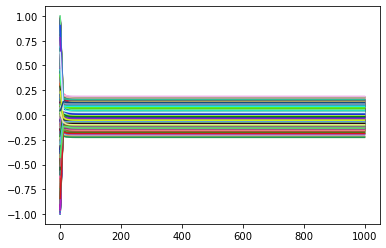

array([[0.09906593, 0.31373451, 0.03691796],
       [0.43203311, 0.48465927, 0.27028397],
       [0.50278279, 0.90493468, 0.13815278],
       ...,
       [0.83857409, 0.92244889, 0.97902011],
       [0.0799119 , 0.28850441, 0.49550806],
       [0.9435679 , 0.91907505, 0.60090792]])

In [70]:
rc.plot2d(tvals, U)

In [94]:
np.max(fixed_res_ode(rstar))

1.4070761222839678e-10

In [93]:
np.max(np.abs(rstar3 - rstar))

4.714235807279366e-10

In [91]:
r0 = 2*np.random.rand(rcomp.res_sz) - 1
tvals = np.linspace(0, 10000, 100)
U = sp.integrate.odeint(rcomp.res_ode, r0, tvals, tfirst=True, args=(u,))
print(np.max(np.abs(U[-1, :] - U[-2, :])))
rstar3 = U[-1, :]

1.3877787807814457e-17


In [78]:
np.max(np.abs(rstar2 - rstar3))

3.388092445488766e-10

In [92]:
np.max(np.abs(fixed_res_ode(rstar3)))

1.1102230246251565e-16

# Fix Failed Prediction

In [39]:
x = np.array([3, 4])
y = np.array([-2, -8])
assert rc.relerr(x, y, order=2) == 13/5
assert rc.relerr(x, y, order='inf') == 12/4
X = np.array([[2, 2], [2, 2]])
Y = np.array([[1, 0.5], [1.5, 2]])
assert np.all(rc.relerr(X, Y, order=2, axis=0) == np.array([1.25**.5 / 8**.5, 1.5 / 8**.5]))
assert np.all(rc.relerr(X.T, Y.T, order="inf", axis=1) == np.array([1/2, 1.5/2]))

In [15]:
rc.relerr(X, Y.T, order="inf", axis=1)

array([0.1, 0.5])

In [16]:
np.max(X.T - Y, axis=1)# / np.max(X, axis=1)

array([5. , 0.5])

In [19]:
x = np.array([3, 4])
y = np.array([-2, -8])
np.sum((x - y)**2)**0.5 / np.sum(x**2)**0.5

2.6

In [30]:
X = np.array([[2, 2], [2, 2]])
Y = np.array([[1, 0.5], [1.5, 2]])
X - Y

array([[1. , 1.5],
       [0.5, 0. ]])

In [36]:
1.25**.5 / 8**.5

0.3952847075210474

In [33]:
rc.relerr(X, Y, order=2, axis=0)

array([0.39528471, 0.53033009])

In [117]:
RES = {
    "res_sz": 5,
    "activ_f": np.tanh,
    "mean_degree": 2.0,
    "ridge_alpha": .00001,
    "spect_rad": 0.1,
    "gamma": 5.,
    "sigma": 1.5,
    "uniform_weights": True,
    "sparse_res": True,
    "signal_dim": 2,
    "map_initial" : "activ_f"
}

def make_data():
    start = np.random.rand()
    t = np.linspace(start, start + 20, 1000)
    U =  np.vstack((np.cos(t), -1 * np.sin(t))).T
    return t, U

def make_train_test_data():
    start = np.random.rand()
    tr = np.linspace(start,100 + start, 10000)
    ts = np.linspace(start + 100, start + 120, 2000)
    signal = lambda x: np.vstack((np.cos(x), -1 * np.sin(x))).T
    return tr, ts, signal(tr), signal(ts)

In [126]:
rcomp = rc.ResComp(**RES)
tr, ts, Utr, Uts = make_train_test_data()
rcomp.train(tr, Utr, window=20, overlap=.95)
pre = rcomp.predict(ts, Uts[0, :])
error = np.mean(np.linalg.norm(pre - Uts, ord=2, axis=0)**2)**(1/2)


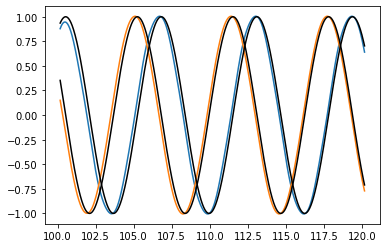

0.13940002963882847


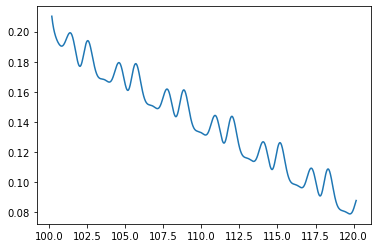

In [127]:
plt.plot(ts, pre)
plt.plot(ts, Uts, c="k")
plt.show()
err = np.sum((pre - Uts)**2, axis=1)**.5
plt.plot(ts, err)
print(np.mean(err))
plt.show()

It seems like the reservoir computer is better able to extrapolate the initial condition when there is a little bit of transience in the beginning of the orbit. My guess is that this would work with any function that sends the training initial condition close to the attracting fixed points of the system.